# Spectrum kernel with Ridge Regression

In [25]:
import sys
sys.path.append('General')
sys.path.append('KRR')

import pandas as pd
import numpy as np
from time import time

from kernel_functions import kernel_spectrum
from spectrum_toolbox import preindexation,Spectrum_embedding

from KernelRegression import KernelRegression

from sklearn.model_selection import KFold
import scipy.sparse as sp

import matplotlib.pyplot as plt

from time import time

In [2]:

# Function to transform numerical to classes 

def pred_to_class(pred):
    pred[pred < 0.5] = 0
    pred[pred >= 0.5] = 1
    return pred

In [35]:
def GridSearch_spectrum(X,y,hyperparameters,K = 6):
    n_lengths = len(hyperparameters['lengths'])
    n_lambdas = len(hyperparameters['lambdas'])
    
    scores_mean = np.zeros((n_lengths,n_lambdas))
    scores_std = np.zeros((n_lengths,n_lambdas))
    
    kf = KFold(n_splits = K)
    
    params = dict()
    
    for i in range(n_lengths):
        params['k'] = hyperparameters['lengths'][i]
        preindex = preindexation(params['k'])
        X_emb = Spectrum_embedding(X,params['k'],preindex = preindex)
        
        for j in range(n_lambdas):
            l = hyperparameters['lambdas'][j]
            acc = []
            
            for train_idx,test_idx in kf.split(X):
                model = KernelRegression("spectrum",params)
                Xtrain,Xtest = X_emb[train_idx,:],X_emb[test_idx,:]
                ytrain,ytest = y[train_idx,None],y[test_idx,None]
                model.fit(Xtrain,ytrain,reg = l)
                ypred = pred_to_class(model.predict(Xtest))

                acc.append((ypred==ytest).mean())
            scores_mean[i,j] = np.array(acc).mean()
            scores_std[i,j] = np.array(acc).std()
        del(preindex)
    return(scores_mean,scores_std)

## K = 0

In [33]:
X = pd.read_csv('data/Xtr0.csv')
y = pd.read_csv('data/ytr0.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
0,TCCTGTGCACATCTGCACCCCTGTTGTGGCCACAAAATGATCCGGC...
1,TTAAGTGTATATCTAATAATTTTTTTGCCTACATTCCTGTGTTACC...
2,GTGCTCAATTAGTTGCCTACAAATAGTAGCCTGGCACAGTGTAAGC...
3,CACCTGGAAAATACAAACAGGCGCAAGAAGAGTTAACCCACAGATC...
4,AAATCACTGCCTATCCTTGGGCCAAAAGGTTTCTACAGGAAGCTGC...


In [5]:
hyperparameters = dict()
hyperparameters['lengths'] = np.arange(2,14)
hyperparameters['lambdas'] = np.logspace(-5,5,11)

In [6]:
start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

548.6747901439667


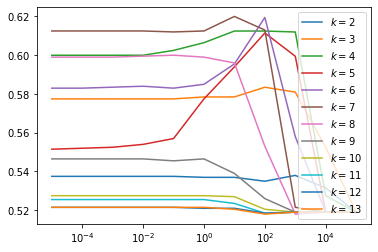

In [7]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


## K = 1

In [39]:
X = pd.read_csv('data/Xtr1.csv')
y = pd.read_csv('data/ytr1.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
2000,AGAAATGAAAGTCATCCAAATAGGAAGAGAAGGAGTCAAAATATCC...
2001,TTCTCTCCAGCACTCTTGTCACCAACTCACATACCATACAGTTTAC...
2002,ACAGCTGACAAGCAGAACCCAGGGTCACAAGGATCCCATTCATGTG...
2003,CAAACTTTTCTATGTTTAGCCATGTGTTAATTAATAAGAAATGTTC...
2004,CTTCGTGGTTGGTCAAGAACGGCAGGAGGTATTTGCCCATCGGTGC...


In [40]:
from spectrum_toolbox import preindexation,Spectrum_embedding

start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

612.7172017097473


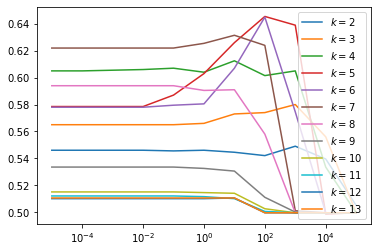

In [41]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


## K = 2

In [45]:
X = pd.read_csv('data/Xtr2.csv')
y = pd.read_csv('data/ytr2.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
4000,GTGCCGACGCAGCGGTGTTGCACCTCCCTCTCCGGCTCTGCTGCCC...
4001,CCTGAGTTTGGTGTTCTGTGGAATTATTGAACCTAAGTAGGTAGTG...
4002,CCAGGTGCTTACCATTATCATGTAAGTTCTCTAACTGTTTCATGTG...
4003,AGAGCGGTGTGGGGGTCACTCAAGAGAACGTGCTGTACCTTGTCAG...
4004,CCCCAGGGGCAGGCGGGCTAGCCCCCCCATCATATGCAAATCATGG...


In [46]:
start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

685.4266819953918


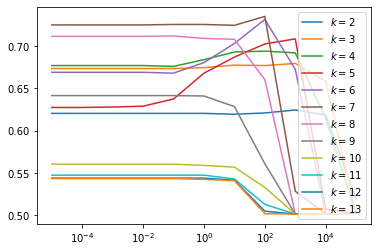

In [47]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()
